# Neural Network Type Classification | TMNIST

## #  **Abstract**

This notebook provides a thorough walkthrough on constructing and training a Convolutional Neural Network (CNN) aimed at character recognition, utilizing the Typography MNIST (TMNIST) dataset. The analysis indicates that the achieved accuracy closely approaches 93.18%.

A Neural Network is a machine learning model type capable of recognizing intricate patterns in data by mimicking the functioning of the human brain. It consists of interconnected nodes, or neurons, organized into layers. Each neuron receives input data, processes it using a mathematical function, and generates an output that passes to the next layer of neurons. This process continues until the final layer produces the model's output.

Convolutional Neural Networks (CNNs) are the predominant neural network architecture for image datasets. They analyze images by detecting specific visual features through convolutions and then distinguishing between them. Unlike other image classification methods, CNNs require minimal preprocessing and can autonomously learn features. Modeled after the network of neurons in the human visual cortex, CNNs excel in processing visual information. Various CNN architectures, such as ResNet and Inception V3, are tailored for top-notch performance on real-world images.

Typography MNIST (TMNIST) is a dataset comprising MNIST-style images representing 94 alphabetic characters, encompassing uppercase and lowercase letters, digits, as well as some special characters like punctuation marks and symbols. Accessible on platforms like Kaggle, the dataset encompasses over 281,000 images.

The dataset is structured within a single CSV file, where the first row contains column headers, and subsequent rows hold data for each image. The 'names' column comprises font file names, while the 'labels' column contains corresponding characters for each image. Pixel values for each image are provided in the remaining 784 columns.

# **Import Libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# About the DataSet
Our goal is to construct and train an artificial neural network on thousands of TMNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This dataset contains 274093 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

Using Tensorflow and keras in the Backend to construct and train the model

# **Importing Data**

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')

In [ ]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f"Number of unique character present in the Dataset: {len(data.labels.unique())}") #Number of Classes

Number of unique character present in the Dataset: 94


In [5]:
X = data.drop(columns=['names','labels']).values
y = data[['labels']].values #Assigning Classes
del data

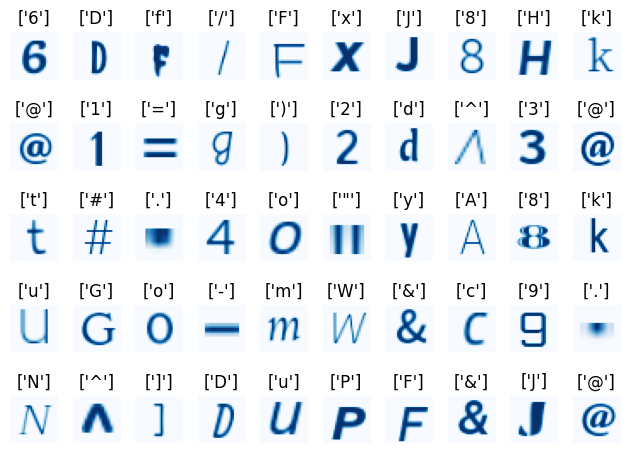

In [25]:
import matplotlib.pyplot as plt

# Assuming X and y are NumPy arrays
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.title(y[i])  # Corrected: Access elements of the NumPy array directly
    plt.imshow(X[i].reshape(28, 28), cmap=plt.get_cmap('Blues'))  # Assuming X contains flattened 28x28 images
    plt.axis('off')  # Optional: Turn off axis for better visualization
plt.tight_layout()  # Optional: Adjust spacing between subplots
plt.show()


In [6]:
X = X.astype('u1') #Setting Datatype of Training features for compatibility with Keras Framework
X.dtype

dtype('uint8')

# Splitting the dataset into test and train data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [8]:
lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(246683,)
Test labels dimension:
(27410,)


### Image Reshaping

The shape of X_train is (205569, 28, 28, 1). Since all the images are in grayscale, the number of channels is 1. In the case of a color image, the number of channels would be 3 (representing Red, Green, and Blue).

We have rescaled the image data to ensure that each pixel falls within the range [0, 1], instead of the original [0, 255]. Normalizing the input in this manner helps ensure that each dimension has a roughly equivalent scale, which is generally beneficial for training neural networks.

In [9]:
X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

In [13]:
X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

# **CNN**
A Convolutional Neural Network (CNN) is composed of different layers, each serving a specific purpose.

* The first layer is the Convolutional Layer, which applies filters on the image to generate feature maps. The ReLU correction layer replaces all negative values received as inputs by zeros.

* The Pooling Layer is used to down-sample the input to enable the model to make assumptions about the features, which reduces over-fitting and training time. The Pooling Layer is usually a bridge between the Convolutional Layer and the Fully Connected (FC) Layer. There are three types of pooling: Max, Average, and Sum.

* After creating all the convolutional layers, we need to flatten them and feed them to the FC Layers, which classify the features learned by the CNN. Dropout is used to overcome overfitting by randomly dropping some neurons from the neural network during training.

* Finally, Activation Layer determines whether a neuron should be activated or not using activation functions like ReLU, Softmax, tanH and Sigmoid. The choice of activation function depends on the specific usage.

In [14]:
cnnmodel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(4,4),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(y_train_label.shape[1], activation='softmax')
])

cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# CNN Model Architecure
The standard architecture of a Convolutional Neural Network (CNN) comprises distinct layers tailored to perform specific operations on input data. Beginning with the input layer, which receives the input image, the network progresses through subsequent layers.

The second layer is the convolutional layer, where a set of filters is applied to the input image. Each filter, represented by a small matrix of weights, convolves across local regions of the input image, generating a feature map that accentuates significant features.

Following the convolutional layer is the pooling layer, tasked with reducing the dimensionality of the feature map. This is achieved by extracting either the maximum or average value from local regions, fostering network resilience against minor input variations.

Continuing, the fourth layer comprises another convolutional layer that applies a subsequent set of filters to the feature map from the preceding layer, followed by another pooling layer.

Subsequently, the fifth layer is a fully connected layer, accepting the output of the previous layer and generating scores corresponding to each possible output class.

Finally, the output layer applies a softmax function to these scores, producing a probability distribution across potential output classes. This architecture has demonstrated significant efficacy in image classification endeavors, including tasks like handwritten digit recognition and object identification in photographs.

![Example Image](https://miro.medium.com/v2/resize:fit:1400/1*kkyW7BR5FZJq4_oBTx3OPQ.png)

In [15]:
cnnmodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 64)            │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 94)                  │          12,126 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,702 (690.24 KB)

 Trainable params: 176,702 (690.24 KB)

 Non-trainable params: 0 (0.00 B)

The model summary outlines a CNN architecture designed for image classification, comprising convolutional, max pooling, flattening, dropout, and dense layers. The first convolutional layer with 32 filters processes the input, followed by max pooling to reduce size. A second convolutional layer with 64 filters further extracts features, succeeded by another max pooling layer. After flattening to a vector, dropout layers reduce overfitting. Two dense layers finalize the model, with the last outputting 94 class probabilities. Total trainable parameters are 176,702, indicating the model's complexity and capacity for learning.

In [17]:
cnn_result = cnnmodel.fit(X_train, y_train_label, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 234s 135ms/step - accuracy: 0.9265 - loss: 0.2274 - val_accuracy: 0.9308 - val_loss: 0.2142
Epoch 2/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 265s 137ms/step - accuracy: 0.9297 - loss: 0.2141 - val_accuracy: 0.9312 - val_loss: 0.2103
Epoch 3/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 243s 140ms/step - accuracy: 0.9325 - loss: 0.2001 - val_accuracy: 0.9354 - val_loss: 0.2023
Epoch 4/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 234s 135ms/step - accuracy: 0.9343 - loss: 0.1939 - val_accuracy: 0.9337 - val_loss: 0.2008
Epoch 5/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 226s 130ms/step - accuracy: 0.9368 - loss: 0.1849 - val_accuracy: 0.9354 - val_loss: 0.2031
Epoch 6/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 258s 128ms/step - accuracy: 0.9394 - loss: 0.1774 - val_accuracy: 0.9358 - val_loss: 0.1967
Epoch 7/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 272s 134ms/step - accuracy: 0.9404 - loss: 0.1723 - val_accuracy: 0.9367 - val_loss: 0.1974
Epoch 8/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 263s 135ms/step - ac

In [18]:
score = cnnmodel.evaluate(X_test, y_test_label, verbose = 0)
print(f"Accuracy of CNN on Test Dataset is :{round(score[1],4)*100}%")

Accuracy of CNN on Test Dataset is :94.12%


In [19]:
predictions = cnnmodel.predict(X_test)

857/857 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


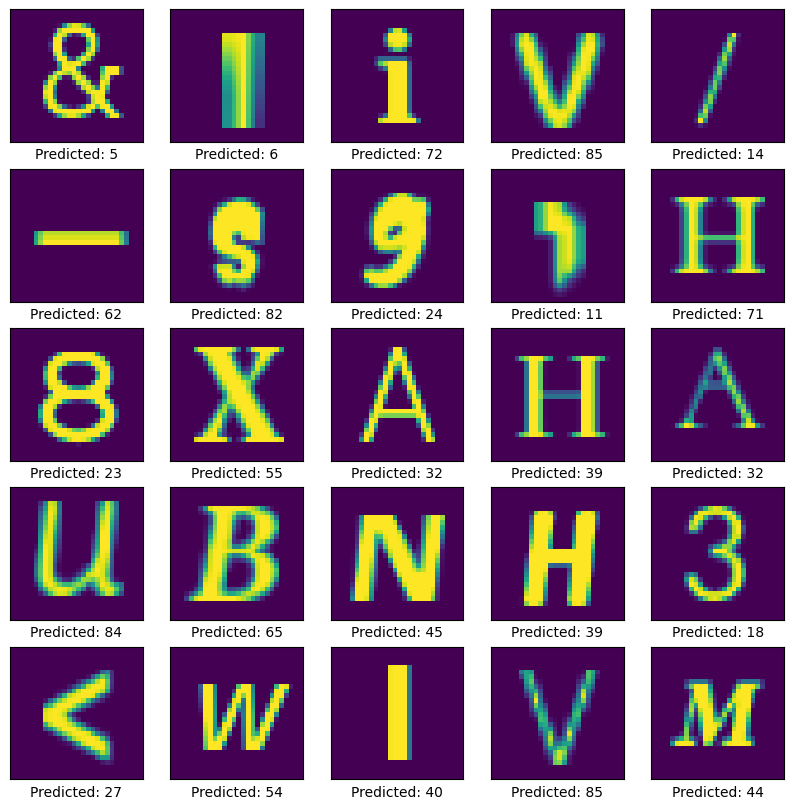

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='viridis')
    plt.xlabel('Predicted: '+str(np.argmax(predictions[i])))
plt.show()

In [21]:
def plot_performance(data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

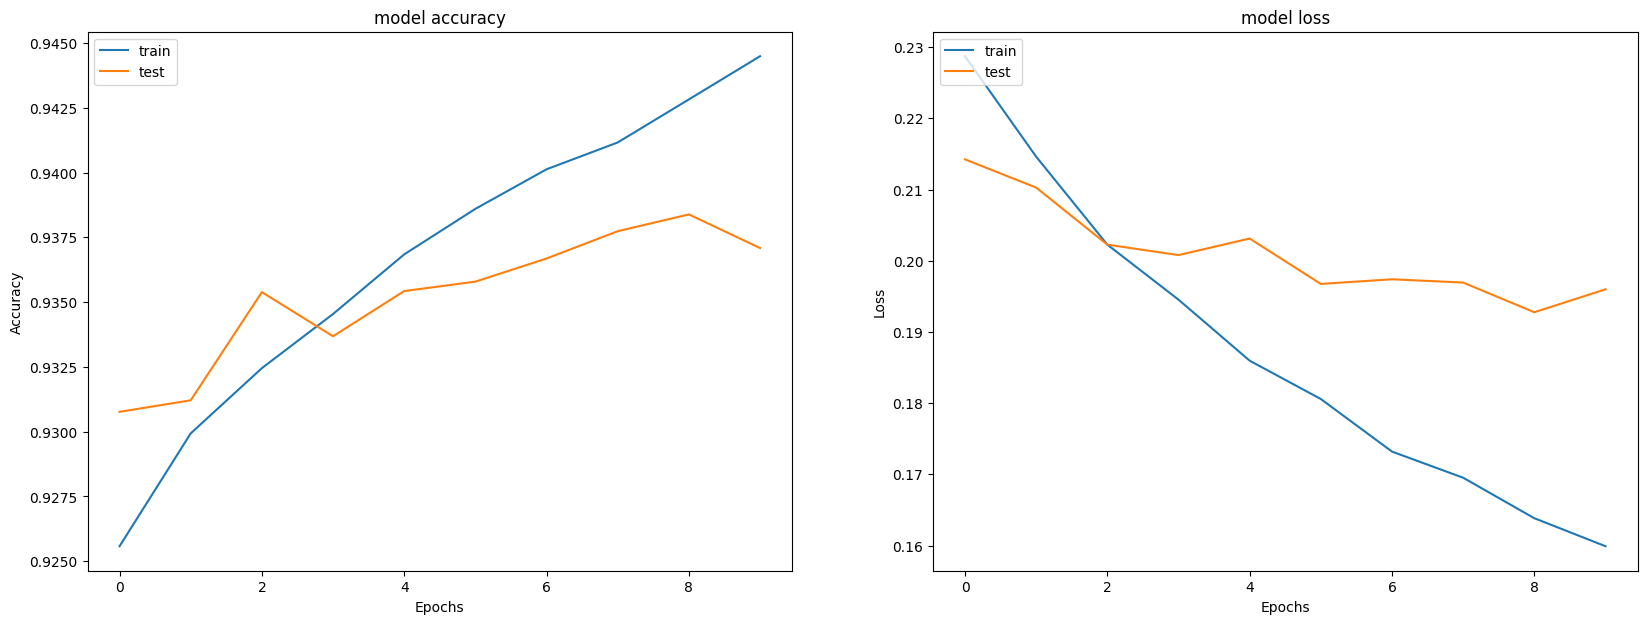

In [28]:
plot_performance(cnn_result)

# Conclusion
The provided graphs depict the training process of a machine learning model over a number of epochs. On the left, the 'model accuracy' graph shows both the training and testing accuracy. Both curves rise sharply and begin to plateau, indicating that the model is learning and its performance on both the training and test sets is improving. However, the training accuracy continues to be slightly higher than the test accuracy, which could suggest some overfitting.

On the right, the 'model loss' graph shows the loss decreasing rapidly, then slowly flattening out, which is typical during training as the model begins to converge and improve its predictions. Similar to the accuracy graph, the training loss is lower than the test loss, which further suggests the model may be overfitting to the training data.

Overall, the graphs suggest that the model is learning effectively from the data. To mitigate potential overfitting, one could consider strategies like early stopping, regularization, or obtaining more training data. Additionally, it's important to ensure that the model is not just memorizing the training data but also generalizing well to unseen data.


The accuracy versus epochs and loss versus epochs graphs indicate that Convolutional Neural Networks (CNNs) outperforms in classifying 2D arrays like images or matrices. This superiority is attributed to CNNs' capability to effectively extract patterns and features from 2D arrays, a task that would be compromised if the arrays were flattened into 1D. For example, when distinguishing between images of numbers like 6 and 8, critical features such as curves may be lost if the images were flattened. Hence, for classification tasks involving higher dimensional arrays, employing CNNs is always preferable.



# References
TensorFlow Core Team. "Convolutional Neural Network (CNN)." TensorFlow Core v2.16.1, TensorFlow. https://www.tensorflow.org/tutorials/images/cnn​ (TensorFlow)​.

Sharma, Aditya. "Python Convolutional Neural Networks (CNN) with TensorFlow Tutorial." DataCamp, DataCamp. https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python​ (Learn R, Python & Data Science Online)​.

Run AI. "TensorFlow CNN: Building Your First CNN with TensorFlow." Run AI. https://www.run.ai/guides/deep-learning-frameworks/tensorflow-cnn​ (RunAI)​.

https://www.kaggle.com/code/riyachaddha/info6105-tmnist-riya-character-recognition/edit

https://www.kaggle.com/code/chinnyd/chinmay-deshpande-tmnist-93

# LICENSES
MIT License

Copyright (c) 2024 riyaneu

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.